In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

def plot_percentage(df, x, y):   
    counts = df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()
    print(counts)
    sns.catplot(x=x, y='percent', hue=y, data=counts, kind='bar')
    plt.show()

df = pd.read_csv('ze_final.csv')

In [4]:
df = df[df['centro'] == 'CETEC']


**Perfil dos Estudantes na Amostra**

- 63% evadiram
- 86% possuem cidade de origem diferente da cidade do campus
- 35% são do sexo feminino
- Idade média dos estudantes é 21

In [7]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['event'].value_counts(normalize=True))

1    0.647229
0    0.352771
Name: event, dtype: float64


In [8]:
idx = (df['time'] == df.groupby('matricula')['time'].transform('max'))

print(df[idx]['is_outra_cidade'].value_counts(normalize=True))

print(df[idx]['sexo'].value_counts(normalize=True))

print(df[idx]['idade'].mean())


1    0.869515
0    0.130485
Name: is_outra_cidade, dtype: float64
1    0.648672
0    0.351328
Name: sexo, dtype: float64
21.062066974595844


**Taxa de evasão é maior para estudantes cuja origem difere da cidade do campus?**

- Cidade de origem parece não explicar evasão (diferença de 3%)

   is_outra_cidade  event    percent
0                0      1  67.477876
1                0      0  32.522124
2                1      1  64.309429
3                1      0  35.690571


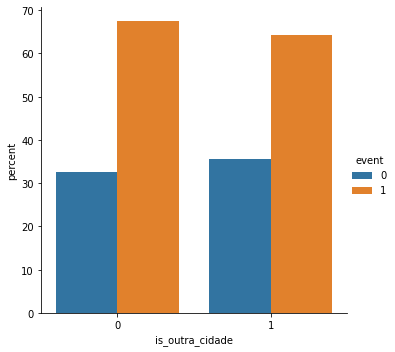

In [11]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

#print(df[idx]['is_outra_cidade'].value_counts(normalize=True))

plot_percentage(df[idx], 'is_outra_cidade', 'event')

**Taxa de evasão é maior para ingressantes no 1o semestre?**

- Evasão é maior entre ingressantes no 2o semestre (70% vs 59%)

1    0.514145
2    0.485855
Name: semestreIngresso, dtype: float64


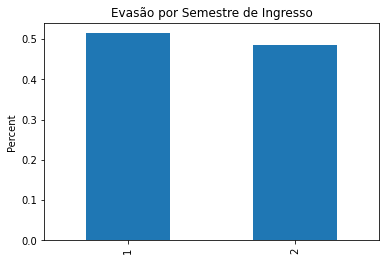

In [12]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')
counts = df.loc[idx, 'semestreIngresso'].value_counts(normalize=True)
print(counts)

ax = counts.plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão por Semestre de Ingresso')
plt.show()


1    0.514145
2    0.485855
Name: semestreIngresso, dtype: float64
   semestreIngresso  event    percent
0                 1      1  59.517125
1                 1      0  40.482875
2                 2      1  70.231729
3                 2      0  29.768271


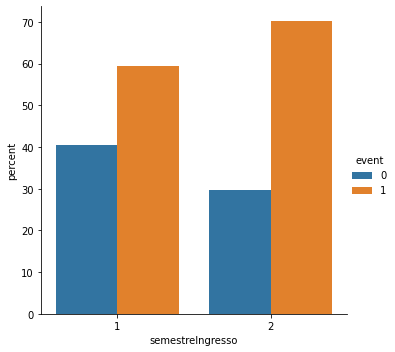

In [13]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['semestreIngresso'].value_counts(normalize=True))

plot_percentage(df[idx], 'semestreIngresso', 'event')

**Taxa de evasão no 2o semestre letivo é maior?**

- Evasão é maior no 2o semestre letivo (70% vs 58%). Por quê? O SISU pode ser uma linha de investigação.

2    0.570919
1    0.429081
Name: semestreLetivo, dtype: float64


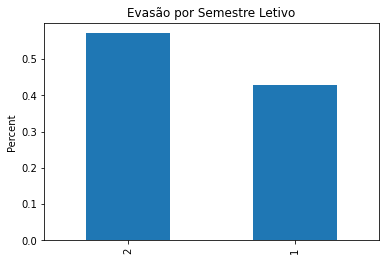

In [14]:
idx = df['event'] == 1

counts = df.loc[idx, 'semestreLetivo'].value_counts(normalize=True)
print(counts)

ax = counts.plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão por Semestre Letivo')
plt.show()


2    0.526848
1    0.473152
Name: semestreLetivo, dtype: float64
   semestreLetivo  event    percent
0               1      1  58.694326
1               1      0  41.305674
2               2      1  70.136986
3               2      0  29.863014


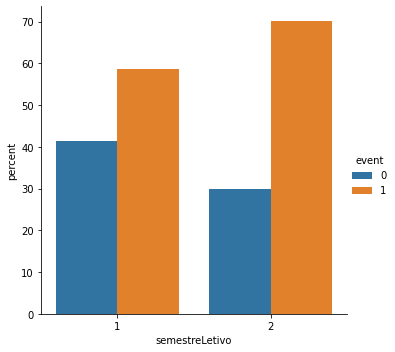

In [15]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['semestreLetivo'].value_counts(normalize=True))

plot_percentage(df[idx], 'semestreLetivo', 'event')

**Há interação entre evasão e o sexo do estudante?**

- Parece não haver diferença entre homens e mulheres (65% vs 63%).
- A taxa de evasão entre mulheres possui uma queda mais acentuada ao longo do tempo.

1    0.656557
0    0.343443
Name: sexo, dtype: float64


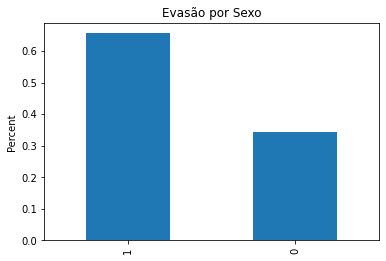

In [16]:
idx = df['event'] == 1

counts = df.loc[idx, 'sexo'].value_counts(normalize=True)
print(counts)

ax = counts.plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão por Sexo')
plt.show()

1    0.648672
0    0.351328
Name: sexo, dtype: float64
   sexo  event    percent
0     0      1  63.270337
1     0      0  36.729663
2     1      1  65.509568
3     1      0  34.490432


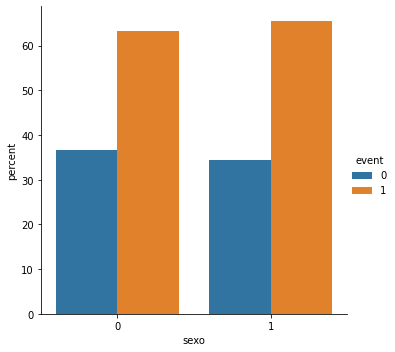

In [17]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['sexo'].value_counts(normalize=True))

plot_percentage(df[idx], 'sexo', 'event')

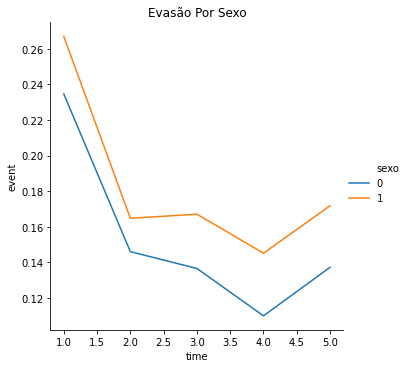

In [93]:
data = df.groupby(['time','sexo']).agg({'event':'mean'}).reset_index()
ax = sns.relplot(x='time', y='event', data=data, hue='sexo',  kind="line")    
ax.set(title='Evasão Por Sexo')    

**Como se comporta a taxa de evasão com o tempo?**

- A taxa de evasão tende a decrescer com o tempo

[Text(0.5, 1.0, 'Evasão Geral')]

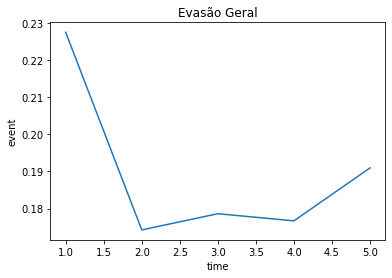

In [18]:
data = df.groupby('time').agg({'event':'mean'}).reset_index()

ax = sns.lineplot(x='time', y='event', data=data)    
ax.set(title='Evasão Geral')

**Há diferenças entre cota e ampla concorrência?**

- Taxa de evasão é maior entre cotistas(67% vs 62%)
- A taxa de evasão de cotistas tende a crescer com o longo do tempo

0    0.548788
1    0.451212
Name: is_cotista, dtype: float64
   is_cotista  event    percent
0           0      1  62.230405
1           0      0  37.769595
2           1      1  67.754319
3           1      0  32.245681


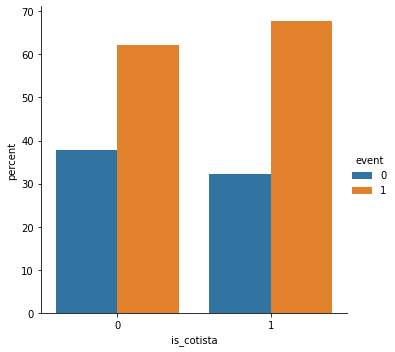

In [19]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['is_cotista'].value_counts(normalize=True))

plot_percentage(df[idx], 'is_cotista', 'event')

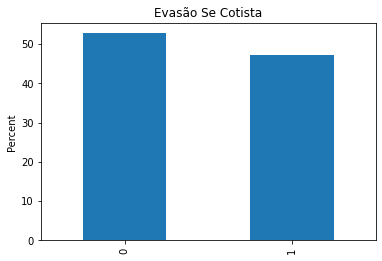

In [20]:
idx = df['event'] == 1

ax = df.loc[idx, 'is_cotista'].value_counts(normalize=True).mul(100).plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão Se Cotista')
plt.show()

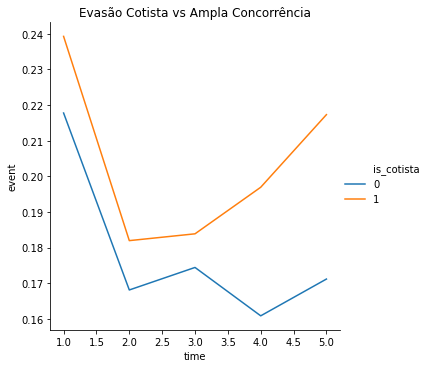

In [21]:
data = df.groupby(['time','is_cotista']).agg({'event':'mean'}).reset_index()
ax = sns.relplot(x='time', y='event', data=data, hue='is_cotista',  kind="line")    
ax.set(title='Evasão Cotista vs Ampla Concorrência')    

**A idade de ingresso afeta a taxa de evasão?**

- Evasão tende tende a ser maior com a idade de ingreso. Por quê? Necessidade de trabalhar? Questões ligadas à natureza dos cursos?

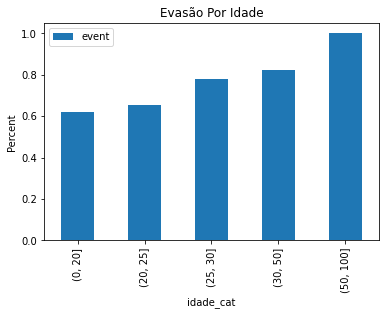

In [22]:
col = 'idade_cat'
df[col] = pd.cut(df.idade, bins=[0,20,25,30,50,100])

idx = df['time'] == df.groupby('matricula')['time'].transform('max')


ax = df[idx].groupby(col).agg({'event':'mean'}).plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão Por Idade')
plt.show()

**Gap (tempo entre o término do ensino médio e o ingresso no curso) afeta a evasão?**

- Taxa de evasão tende a crescer com o aumento do gap.

(0.0, 1.0]      0.446353
(1.0, 2.0]      0.200723
(2.0, 3.0]      0.085292
(10.0, 41.0]    0.058168
(3.0, 4.0]      0.055756
(4.0, 5.0]      0.049427
(5.0, 6.0]      0.033454
(6.0, 7.0]      0.022604
(7.0, 8.0]      0.018686
(8.0, 9.0]      0.017782
(9.0, 10.0]     0.011754
Name: gap_cat, dtype: float64


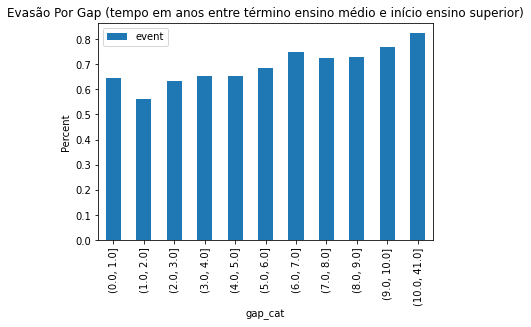

In [23]:
col = 'gap_cat'
df[col] = pd.cut(df.gap, bins=[0,1,2,3,4,5,6,7,8,9,10, df.gap.max()])

idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx][col].value_counts(normalize=True))

ax = df[idx].groupby(col).agg({'event':'mean'}).plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão Por Gap (tempo em anos entre término ensino médio e início ensino superior)')
plt.show()